# STEPS:

## Import relevant libraries/modules
- Separate independent and dependent data
- split data into train and test set
- model training
- model predictions
- model evaluations

In [2]:
!pip install scikit-learn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import warnings 
warnings.filterwarnings('ignore')

In [193]:
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [91]:
df.shape

(545, 13)

In [195]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


# Separate independent and dependent data

In [197]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [203]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea']]
y = df['price']
X,y

(     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
 0    7420         4          2        3         1          0         0   
 1    8960         4          4        4         1          0         0   
 2    9960         3          2        2         1          0         1   
 3    7500         4          2        2         1          0         1   
 4    7420         4          1        2         1          1         1   
 ..    ...       ...        ...      ...       ...        ...       ...   
 540  3000         2          1        1         1          0         1   
 541  2400         3          1        1         0          0         0   
 542  3620         2          1        1         1          0         0   
 543  2910         3          1        1         0          0         0   
 544  3850         3          1        2         1          0         0   
 
      hotwaterheating  airconditioning  parking  prefarea  
 0                  0                1

# Split into training and test set

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True , random_state = 42)

In [207]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
46,6000,3,2,4,1,0,0,0,1,1,0
93,7200,3,2,1,1,0,1,0,1,3,0
335,3816,2,1,1,1,0,1,0,1,2,0
412,2610,3,1,2,1,0,1,0,0,0,1
471,3750,3,1,2,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,1,0,0,0,1,0,0
106,5450,4,2,1,1,0,1,0,1,0,1
270,4500,3,2,3,1,0,0,1,0,1,0
435,4040,2,1,1,1,0,0,0,0,0,0


In [209]:
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
316,5900,4,2,2,0,0,1,0,0,1,0
77,6500,3,2,3,1,0,0,0,1,0,1
360,4040,2,1,1,1,0,0,0,0,0,0
90,5000,3,1,2,1,0,0,0,1,0,0
493,3960,3,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
15,6000,4,1,2,1,0,1,0,0,2,0
357,6930,4,1,2,0,0,0,0,0,1,0
39,6000,4,2,4,1,0,0,0,1,1,0
54,6000,3,2,2,1,1,0,0,1,1,0


In [211]:
y_train

46     7525000
93     6300000
335    3920000
412    3430000
471    3010000
        ...   
71     6755000
106    6160000
270    4340000
435    3290000
102    6195000
Name: price, Length: 436, dtype: int64

In [213]:
y_test

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
15     9100000
357    3773000
39     7910000
54     7350000
155    5530000
Name: price, Length: 109, dtype: int64

In [215]:
X_train.shape, X_test.shape

((436, 11), (109, 11))

In [217]:
y_train.shape,y_test.shape

((436,), (109,))

# Model training

In [219]:
X_train, y_train

(     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
 46   6000         3          2        4         1          0         0   
 93   7200         3          2        1         1          0         1   
 335  3816         2          1        1         1          0         1   
 412  2610         3          1        2         1          0         1   
 471  3750         3          1        2         1          0         0   
 ..    ...       ...        ...      ...       ...        ...       ...   
 71   6000         4          2        4         1          0         0   
 106  5450         4          2        1         1          0         1   
 270  4500         3          2        3         1          0         0   
 435  4040         2          1        1         1          0         0   
 102  5500         3          2        4         1          1         0   
 
      hotwaterheating  airconditioning  parking  prefarea  
 46                 0                1

In [221]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

- y = mx + c
- y = m1x1 + m2x2 ...... m11x11 + c

In [223]:
X.shape

(545, 11)

In [225]:
X.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking',
       'prefarea'],
      dtype='object')

In [231]:
model.coef_
# to get the m1 , m2 ,m3 .... values

array([2.37710510e+02, 7.84836476e+04, 1.10932614e+06, 4.26909551e+05,
       4.12677757e+05, 2.43606446e+05, 4.35005497e+05, 7.12264653e+05,
       8.08415428e+05, 2.47443135e+05, 6.36787694e+05])

In [237]:
pd.DataFrame(model.coef_ , index = X.columns , columns = ['Coefficients/slopes'])

,Coefficients/slopes
area,2.377105e+02
bedrooms,7.848365e+04
bathrooms,1.109326e+06
stories,4.269096e+05
mainroad,4.126778e+05
guestroom,2.436064e+05
basement,4.350055e+05
hotwaterheating,7.122647e+05
airconditioning,8.084154e+05
parking,2.474431e+05


# Model Predictions

In [242]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [244]:
X_train[:3]

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
46,6000,3,2,4,1,0,0,0,1,1,0
93,7200,3,2,1,1,0,1,0,1,3,0
335,3816,2,1,1,1,0,1,0,1,2,0


In [246]:
y_train[:3]

46     7525000
93     6300000
335    3920000
Name: price, dtype: int64

In [248]:
y_pred_train[:3]

array([6984113.26040383, 6918528.98606372, 4678863.69633127])

In [250]:
y_test[:3]

316    4060000
77     6650000
360    3710000
Name: price, dtype: int64

In [252]:
y_pred_test[:3]

array([5398919.06668406, 7065403.52242257, 2993803.65442489])

# Model Evaluation 

In [259]:
# For training data

print(mean_squared_error(y_train, y_pred_train))
print(np.sqrt(mean_squared_error(y_train, y_pred_train)))
print(mean_absolute_error(y_train, y_pred_train))
print(r2_score(y_train,y_pred_train))

992481000009.7853
996233.4063911857
732930.5395116968
0.6781204341087314


Text(0, 0.5, 'Predicted price')

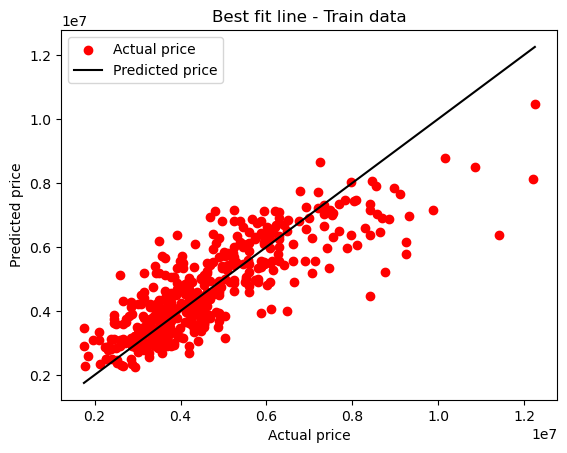

In [295]:
plt.scatter(y_train,y_pred_train , label = 'Actual price', color = 'red')
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],color = 'k' , label = 'Predicted price')
plt.legend()
plt.title('Best fit line - Train data')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')

In [305]:
# For training data

def training_evaluation(actual,predicted) :
    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    mae = mean_absolute_error(actual,predicted)
    r2 = r2_score(actual,predicted)

    print(f'MSE:{mse}')
    print(f'RMSE:{rmse}')
    print(f'MAE:{mae}')
    print(f'R2_SCORE:{r2}')

    plt.scatter(actual,predicted , label = 'Actual price', color = 'red')
    plt.plot([actual.min(),predicted.max()],[actual.min(),predicted.max()],color = 'k' , label = 'Predicted price')
    plt.legend()
    plt.title('Best fit line - Train data')
    plt.xlabel('Actual price')
    plt.ylabel('Predicted price')

MSE:992481000009.7853
RMSE:996233.4063911857
MAE:732930.5395116968
R2_SCORE:0.6781204341087314


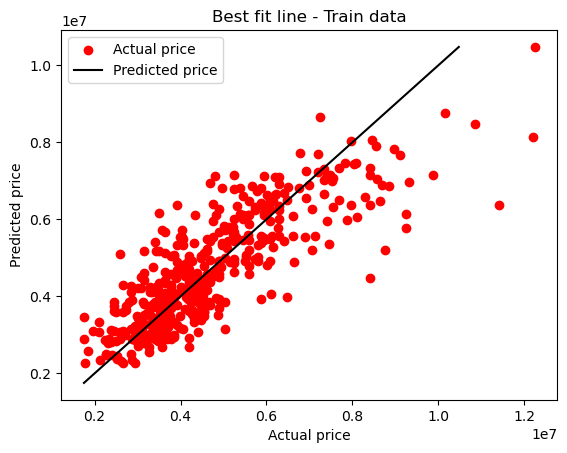

In [307]:
training_evaluation(y_train,y_pred_train)

MSE:1800793719718.967
RMSE:1341936.5557726517
MAE:979112.2162187379
R2_SCORE:0.6437296086614117


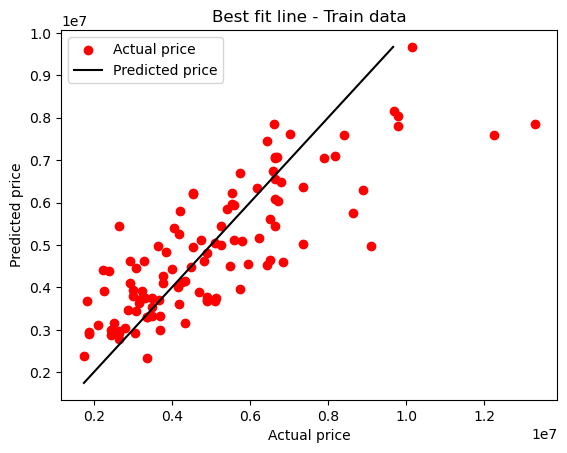

In [303]:
# For test data
def test_evaluation(actual,predicted) :
    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    mae = mean_absolute_error(actual,predicted)
    r2 = r2_score(actual,predicted)

    print(f'MSE:{mse}')
    print(f'RMSE:{rmse}')
    print(f'MAE:{mae}')
    print(f'R2_SCORE:{r2}')

    plt.scatter(actual,predicted , label = 'Actual price', color = 'b')
    plt.plot([actual.min(),predicted.max()],[actual.min(),predicted.max()],color = 'k' , label = 'Predicted price')
    plt.legend()
    plt.title('Best fit line - Test data')
    plt.xlabel('Actual price')
    plt.ylabel('Predicted price')
training_evaluation(y_test,y_pred_test)

In [271]:
y_train.min()

1750000

In [273]:
y_train.max()

12250000